<a href="https://colab.research.google.com/github/Allen123321/DEMO-DL/blob/master/smote_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

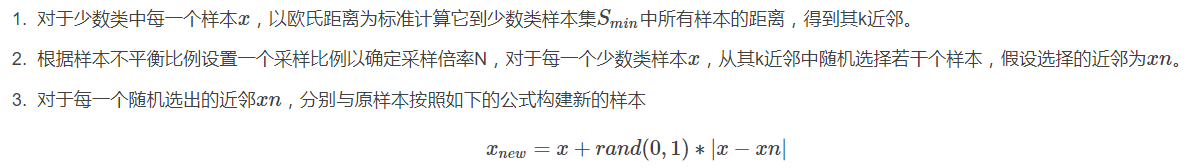

In [4]:
import random
from sklearn.neighbors import NearestNeighbors
import numpy as np


In [6]:
class Smote(object):
    def __init__(self, N=50, k=5, r=2):
        # 初始化self.N, self.k, self.r, self.newindex
        self.N = N
        self.k = k
        # self.r是距离决定因子
        self.r = r
        # self.newindex用于记录SMOTE算法已合成的样本个数
        self.newindex = 0

    def fit(self, samples):
        # 初始化self.samples, self.T, self.numattrs
        self.samples = samples
        # self.T是少数类样本个数，self.numattrs是少数类样本的特征个数
        self.T, self.numattrs = self.samples.shape
        
        # 查看N%是否小于100%
        if(self.N < 100):
            # 如果是，随机抽取N*T/100个样本，作为新的少数类样本
            np.random.shuffle(self.samples)
            self.T = int(self.N*self.T/100)
            self.samples = self.samples[0:self.T,:]
            # N%变成100%
            self.N = 100

        # 查看从T是否不大于近邻数k
        if(self.T <= self.k):
            # 若是，k更新为T-1
          self.k = self.T - 1
              
          # 令N是100的倍数
        N = int(self.N/100)
        # 创建保存合成样本的数组
        self.synthetic = np.zeros((self.T * N, self.numattrs))
          
          # 调用并设置k近邻函数
        neighbors = NearestNeighbors(n_neighbors=self.k+1, 
                                    algorithm='ball_tree', 
                                    p=self.r).fit(self.samples)
          
        # 对所有输入样本做循环
        for i in range(len(self.samples)):
            # 调用kneighbors方法搜索k近邻
            nnarray = neighbors.kneighbors(self.samples[i].reshape((1,-1)),
                                          return_distance=False)[0][1:]

            # 把N,i,nnarray输入样本合成函数self._populate
            self.__populate(N, i, nnarray)

        # 最后返回合成样本self.synthetic
        return self.synthetic
        # 构建合成样本函数
    def __populate(self, N, i, nnarray):
        # 按照倍数N做循环
        for j in range(N):
            # attrs用于保存合成样本的特征
            attrs = []
            # 随机抽取1～k之间的一个整数，即选择k近邻中的一个样本用于合成数据
            nn = random.randint(0, self.k-1)
            
            # 计算差值
            diff = self.samples[nnarray[nn]] - self.samples[i]
            # 随机生成一个0～1之间的数
            gap = random.uniform(0,1)
            # 合成的新样本放入数组self.synthetic
            self.synthetic[self.newindex] = self.samples[i] + gap*diff

            # self.newindex加1， 表示已合成的样本又多了1个
            self.newindex += 1

    


    


In [7]:
samples = np.array([[3,6], [4,3], [6,2],
                    [7,4], [5,5], [2,2]])

smote = Smote(N=325)
synthetic_points = smote.fit(samples)
print(synthetic_points)

[[6.00295884 4.49852058]
 [3.23729576 5.28811272]
 [4.98031649 5.00984175]
 [6.65522049 3.8850735 ]
 [3.73355719 3.79932843]
 [3.4463588  2.7231794 ]
 [5.62909414 3.11271759]
 [4.87105377 2.        ]
 [5.89345636 2.31963093]
 [5.93333428 4.53333286]
 [5.90061671 4.54969165]
 [6.65802854 4.17098573]
 [4.02344308 3.04688616]
 [4.34343212 5.32828394]
 [4.90222018 4.80444036]
 [2.73695621 2.73695621]
 [4.56967492 4.56967492]
 [4.89918561 4.89918561]]


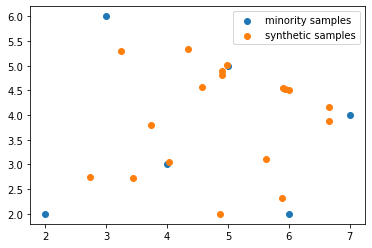

In [8]:
import matplotlib.pyplot as plt

plt.scatter(samples[:,0], samples[:,1])
plt.scatter(synthetic_points[:,0], synthetic_points[:,1])
plt.legend(["minority samples", "synthetic samples"])

self.r是距离决定因子，用于sklearn的k近邻算法NearestNeighbors的输入。

self.r=2，最近邻算法采用欧式距离
self.r=1，则是曼哈顿距离
self.r取其他值，则采用明斯基距离
self.newindex用于记录SMOTE算法已合成的样本个数。